In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot, iplot, init_notebook_mode
import seaborn as sns
import plotly.express as px

In [3]:
data=pd.read_csv('../data/raw/supermarket_sales.csv',date_parser=True)

In [4]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
#Checking for missing values
#No missing values in our data
data.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
#Extracting date information into Day,Month,Year
def split_date(data):
    data['Date']=pd.to_datetime(data['Date'])
    data['Year']=data.Date.dt.year
    data['Month']=data.Date.dt.month
    data['Day']=data.Date.dt.day

In [7]:
#Spliting our date data into day ,month and year
split_date(data)
#check how now our data looks like
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,2019,3,8
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019,3,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019,1,27
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019,2,8


In [8]:
#all our data is for the same Year 2019
data.Year.value_counts()

2019    1000
Name: Year, dtype: int64

In [9]:
#Checking the data across the months (data available for the months of JAN-MARCH)
data.Month.value_counts()

1    352
3    345
2    303
Name: Month, dtype: int64

### Exploratory Data Analysis
#### Customers Gender Distribution

In [10]:
#get the total numner of customers in our dataset
print(data['Gender'].count())
#Get total numbe of customers per their Gender Male of female
data['Gender'].value_counts()

1000


Female    501
Male      499
Name: Gender, dtype: int64

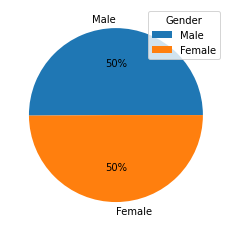

In [11]:
#Get the distribution of the customers by their gender
gender=data.Gender.value_counts()
gender_labels=['Male','Female']
plt.pie(gender,labels=gender_labels,autopct='%.0f%%')
plt.legend(title='Gender')
plt.show()

From the dataset of a total of 1000 customers we see that there is an equal percentage distribution between it's male and female customers at 50% each.

In [12]:
#Preffered payment type 
data[['Gender','Payment']].value_counts(ascending=True).to_dict()

{('Male', 'Credit card'): 148,
 ('Female', 'Ewallet'): 160,
 ('Female', 'Credit card'): 163,
 ('Male', 'Cash'): 166,
 ('Female', 'Cash'): 178,
 ('Male', 'Ewallet'): 185}

In [13]:
#Generate a DataFrame of payment and their total use across supermarket customers
paymentcounts=data['Payment'].value_counts().to_dict()
df=pd.DataFrame(list(paymentcounts.items()),columns=['Payment','Counts'])
df

,Payment,Counts
0,Ewallet,345
1,Cash,344
2,Credit card,311


In [14]:
#plotly.express contains functions that can create entire figures at once, and is referred to as Plotly Express or PX
payment_fig=px.pie(df,values='Counts',names='Payment',title='Supermarket Payment preference',labels='Payment')
payment_fig.update_traces(textposition='inside',textinfo='percent+label')
payment_fig.show()

The most prefered payment type is Ewallet at 34.5% followed by Cash at 34.4% and Credit card at 31.1%. These differences are closely to each other ranging between 30% and 34% .

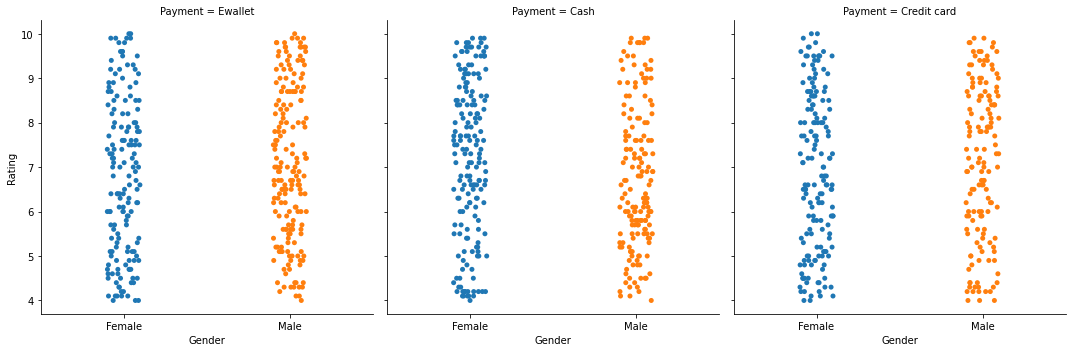

In [15]:
#distribution based on prefered payment type
sns.catplot(x='Gender',y='Rating',col='Payment',data=data)
plt.show()

In [16]:
#Payment preference types
gender_payment=data[['Payment','Gender']].value_counts().to_dict()
df_genderpayment=pd.DataFrame(list(gender_payment.items()),columns=['Payment','Gender'])
gender_paymentfig=px.pie(df_genderpayment,values='Gender',names='Payment',title='Customer Payment type by Gender',labels='Payment')
gender_paymentfig.update_traces(textposition='inside',textinfo='percent+label')
gender_paymentfig.show()

When we compare the payment type usage across the genders we find out that Ewallet use among male customers at 18.5% was the prefered payment type compared to it's female use at 16%.

In [17]:
#Sales per product line categories in percentage
(data['Product line'].value_counts())/data['Product line'].count()*100

Fashion accessories       17.8
Food and beverages        17.4
Electronic accessories    17.0
Sports and travel         16.6
Home and lifestyle        16.0
Health and beauty         15.2
Name: Product line, dtype: float64

In [18]:
product_avgyearlysales=data.groupby('Product line')['gross income'].count().to_dict()
df_yearsales=pd.DataFrame(list(product_avgyearlysales.items()),columns=['product line','Count'])
fig=px.bar(df_yearsales,
          x='product line',
          y='Count',
          title='Sales per Product',
          color_discrete_sequence=["Orange"],template='plotly_dark')
fig.show()

When it comes to sales based on Product Line Categories across all branches,Fashion accessories were the most sold at 17.8%(178) followed by Food and beverages at 17.4%(174) then Electronic accessories at 17%(170).Sports and travel items came in at fourth position with 16.6%(166) follwed by Health and lifestyle products at 16%(160) and the product that had it's sales lowest among the other categories was product line under Health and beauty at 15.2% (152).

Worth noting is how the distribution of these products fell between 17% as the most sold and 15% as the least sold.

In [19]:
#Calculating the supermarket gross income based on the city it's in
avgyearlysales=data.groupby('City')['gross income'].count().to_dict()
df_yearsales=pd.DataFrame(list(avgyearlysales.items()),columns=['City','Count'])
fig=px.bar(df_yearsales,
          x='City',
          y='Count',
          title=' Sales per City',
          color_discrete_sequence=["Orange"],template='plotly_dark')
fig.show()

The supermarket in Yangon city had the highest gross income followed by the one in Mandalay city and Naypytaw city respectively.

Just to give an insight on why the branch in Yangon city had the highest gross income is because Yangon (formerly Rangoon) is Myanmar’s largest city and former seat of government. Apart from serving as the country’s financial centre, Yangon is also a trade and logistics hub. Home to the country’s main air and sea ports it is also served by road and rail networks.https://www.eyeonasia.gov.sg/asean-countries/know/overview-of-asean-countries/yangon-a-city-profile/

Mandalay, city, north-central Myanmar (Burma), the second largest in the country (after Yangon [Rangoon]). Located on the Irrawaddy River, it lies at the centre of mainland Myanmar and is the focus of regional communications and trade and transportation routes.https://www.myanmore.com/mandalay/

Naypyidaw is a unique city in the region. It is a fully constructed large city but with very few inhabitants compared to its size https://wikitravel.org/en/Naypyidaw

In [20]:
#Customer type in contribution to gross income
customer_gross=data.groupby('Customer type')['gross income'].count().to_dict()
cust_grossdf=pd.DataFrame(list(customer_gross.items()),columns=['Customer type','Counts'])
cust_grossdf

,Customer type,Counts
0,Member,501
1,Normal,499


In [21]:
#Visualizing through a pie chart
cust_grossfig=px.pie(cust_grossdf,values='Counts',names='Customer type',title='Gross income in relation to customer type',labels='Customer Type')
cust_grossfig.update_traces(textposition='inside',textinfo='percent+label')
cust_grossfig.show()

There is a relation to high gross income with customer type being a member at 50.1% while a Normal customer at 49.9%

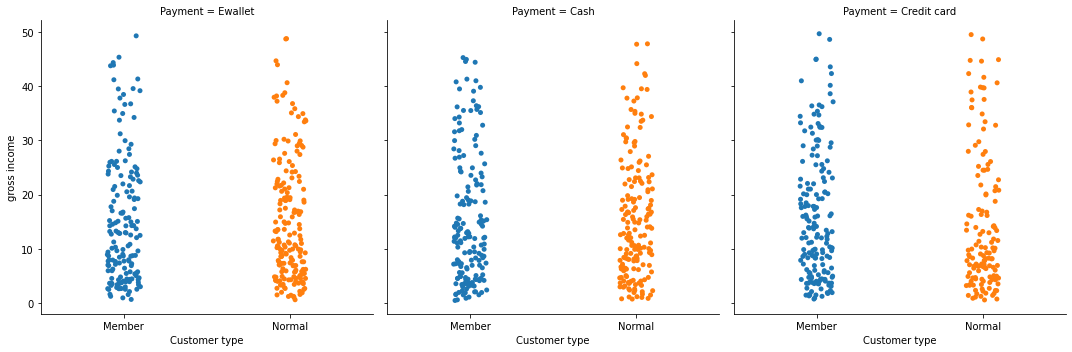

In [22]:
#Distribution of payment preference on Customer type
sns.catplot(x='Customer type',y='gross income',col='Payment',data=data)
plt.show()

Worth noting here is payment type Ewallet and Credit card have more Member and Normal customer type contributing above 40 gross income compared to both Member and normal customer type using cash.

In [23]:
#Comparing the supermarket customer type based on their gender 
(data.groupby('Gender')['Customer type'].value_counts())/1000 *100

Gender  Customer type
Female  Member           26.1
        Normal           24.0
Male    Normal           25.9
        Member           24.0
Name: Customer type, dtype: float64

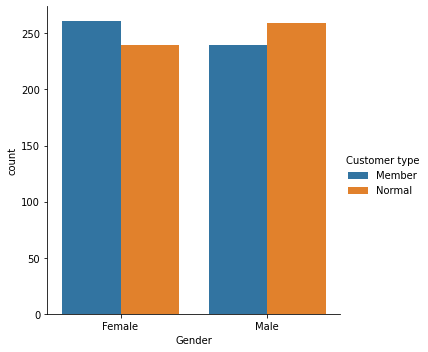

In [24]:
sns.catplot(data=data,x='Gender',kind='count',hue='Customer type');

Most of the female customers are members at 261 compared to male customers at 240,while most of the males are of normal customer type 259 with female normal customers at 240.

Branch  Customer type
A       Normal           173
        Member           167
B       Normal           167
        Member           165
C       Member           169
        Normal           159
Name: Customer type, dtype: int64


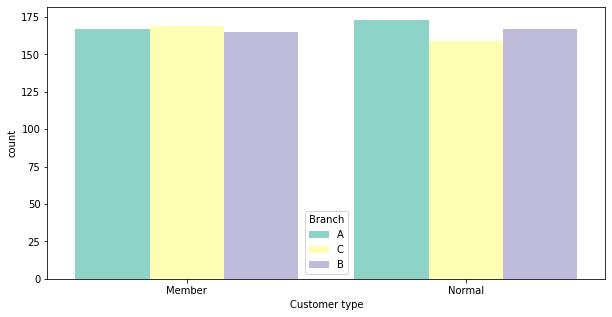

In [25]:
print(data.groupby('Branch')['Customer type'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(data=data,x="Customer type",hue="Branch",saturation=True,palette="Set3");

When comparing the customer type with their branch we find out that supermarkets in branch A and B have the highest customer number who are normal while branch C has the highest in member customer type.

From our catplot above we found out that a majority of male customers were of normal customer type while the female were of member this plays out here where in branches A and B have the most male customers which relates to the overal customer type count.

Branch  Gender
A       Male      179
        Female    161
B       Male      170
        Female    162
C       Female    178
        Male      150
Name: Gender, dtype: int64


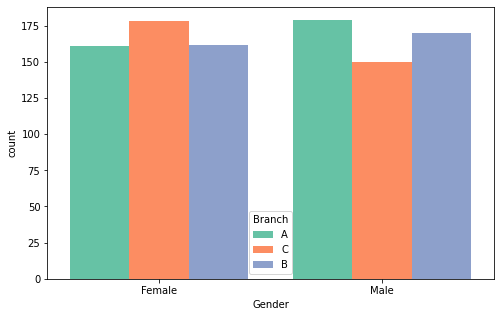

In [26]:
print(data.groupby('Branch')['Gender'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(data=data,x="Gender",hue="Branch",saturation=True,palette="Set2");

The number of female customers are mostly found in branch C with almost equal numbers across branch A and B while for the male customers a majority of them are found in branch A followed by brach B then branch C.

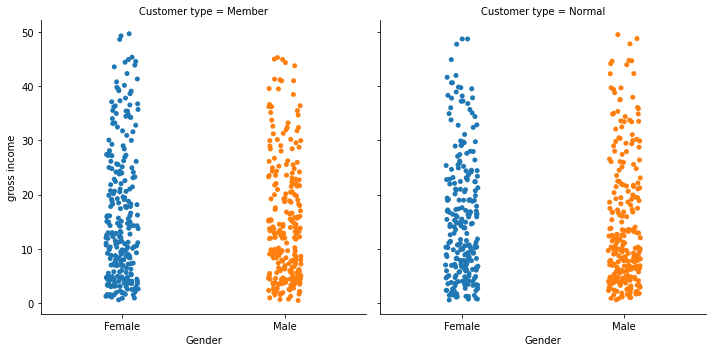

In [27]:
sns.catplot(data=data,x='Gender',y='gross income',col='Customer type')
plt.show()

The gross income above 40 a majority of them comes from Female customers of member type,while from the male customers gross income above 40 a majority of it comes from normal customers.

In [28]:
data[['City','Payment']].value_counts(ascending=True)

City       Payment    
Naypyitaw  Credit card     98
Yangon     Credit card    104
Naypyitaw  Ewallet        106
Mandalay   Credit card    109
           Cash           110
Yangon     Cash           110
Mandalay   Ewallet        113
Naypyitaw  Cash           124
Yangon     Ewallet        126
dtype: int64

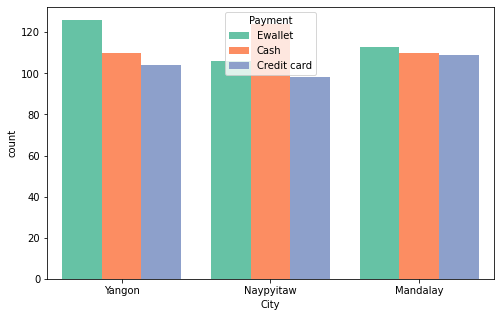

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(data=data,x="City",hue="Payment",saturation=True,palette="Set2");

When it comes to prefered method of payment across the 3 supermarket branches ,the branch in the largest city being Yangon as well as the second largest Mandalay city we find Ewallet in the most prefered payment time while cash is the most prefered payment time in the the less populated city of Napyitaw.

Credit card use is mostly used in Mandalay compared to the other braches but comes in third after Ewallet and Cash respectively.

In [30]:
data.groupby('Gender')['Product line'].value_counts()

Gender  Product line          
Female  Fashion accessories       96
        Food and beverages        90
        Sports and travel         88
        Electronic accessories    84
        Home and lifestyle        79
        Health and beauty         64
Male    Health and beauty         88
        Electronic accessories    86
        Food and beverages        84
        Fashion accessories       82
        Home and lifestyle        81
        Sports and travel         78
Name: Product line, dtype: int64

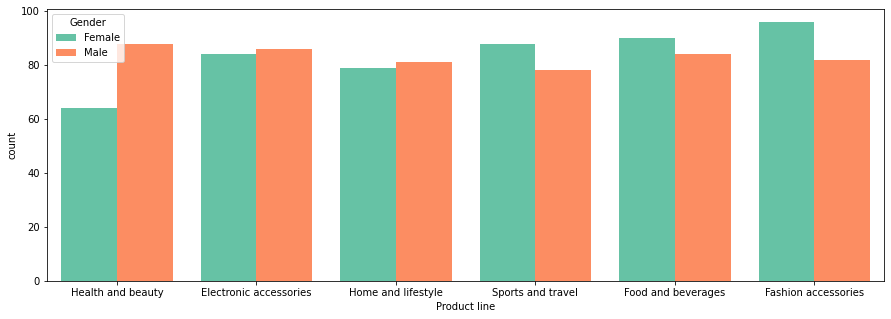

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(data=data,x="Product line",hue="Gender",saturation=True,palette="Set2");

When stocking items in a shop or supermarket it's always good to have in mind the target customer. With this mind from our dataset we find out that female customers have the most purchases in productl lines of (Fashion accessories,Food and beverage,sports and travel) while the male customers have most purchases in Health and beauty with slight purchase difference in Home and lifestyle,electronic accessories.

Product line            City     
Electronic accessories  Yangon       60
                        Mandalay     55
                        Naypyitaw    55
Fashion accessories     Naypyitaw    65
                        Mandalay     62
                        Yangon       51
Food and beverages      Naypyitaw    66
                        Yangon       58
                        Mandalay     50
Health and beauty       Mandalay     53
                        Naypyitaw    52
                        Yangon       47
Home and lifestyle      Yangon       65
                        Mandalay     50
                        Naypyitaw    45
Sports and travel       Mandalay     62
                        Yangon       59
                        Naypyitaw    45
Name: City, dtype: int64


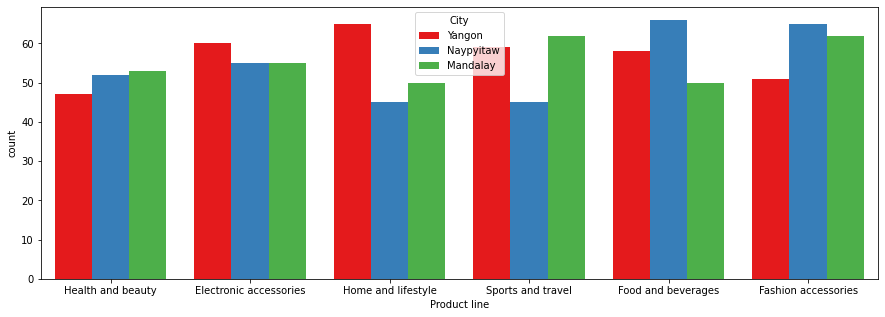

In [32]:
print(data.groupby('Product line')['City'].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(data=data,x="Product line",hue="City",saturation=True,palette="Set1");

The location of a supermarket can also determine the purchases based on the geographical position of the city,economic activity ,population just to name but a few.

When it comes to Food and beverages ,Fashion accessories product lines the supermarket in Napyitaw has the most sales with Home and lifestyle tieing in Yangon with Fashion accessories sales in Napyitaw.

The branch in Mandalay has the most sales when it comes to sports and travel with fashion accessories sales coming second after Napyitaw branch.

This plot helps in finding out how the specific product line sells per branch an example is how sports and travel ,home and lifestyle sales are below 50 in Napyitaw compared to other braches while in Yangon branch health and beauty products sell below 50 compared to other branches.

In [33]:
data.groupby('Branch')['gross income'].count()

Branch
A    340
B    332
C    328
Name: gross income, dtype: int64

In [34]:
sales_perbranch=data.groupby('Branch')['gross income'].count().to_dict()
df_branchsales=pd.DataFrame(list(sales_perbranch.items()),columns=['Branch','Count'])
fig=px.bar(df_branchsales,
          x='Branch',
          y='Count',
          title='Sales per Branch',
          color_discrete_sequence=["Orange"],template='plotly_dark')
fig.show()

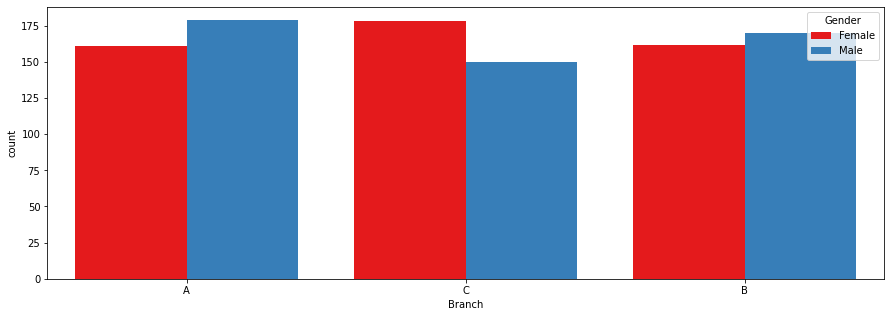

In [35]:
plt.figure(figsize=(15,5))
sns.countplot(data=data,x="Branch",hue="Gender",saturation=True,palette="Set1");

Branch A has the highest sales compared to other branches followed by branch B then branch C.When you compared the customer Gender in we see that most males are in branch A with the highest followed by branch B ,branch C has females as the most customers

<AxesSubplot:>

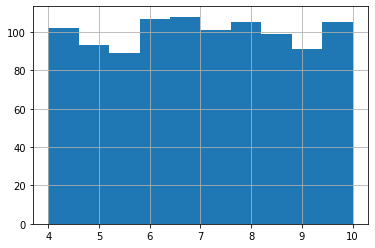

In [36]:
data.Rating.hist()

The customer rating across the supermarket falls between 4 being the lowest and 10 being the highe

Rating  Branch
4.0     B         5
        C         4
        A         2
4.1     B         6
        C         6
                 ..
9.9     B         5
        C         4
10.0    B         3
        A         1
        C         1
Name: Branch, Length: 183, dtype: int64


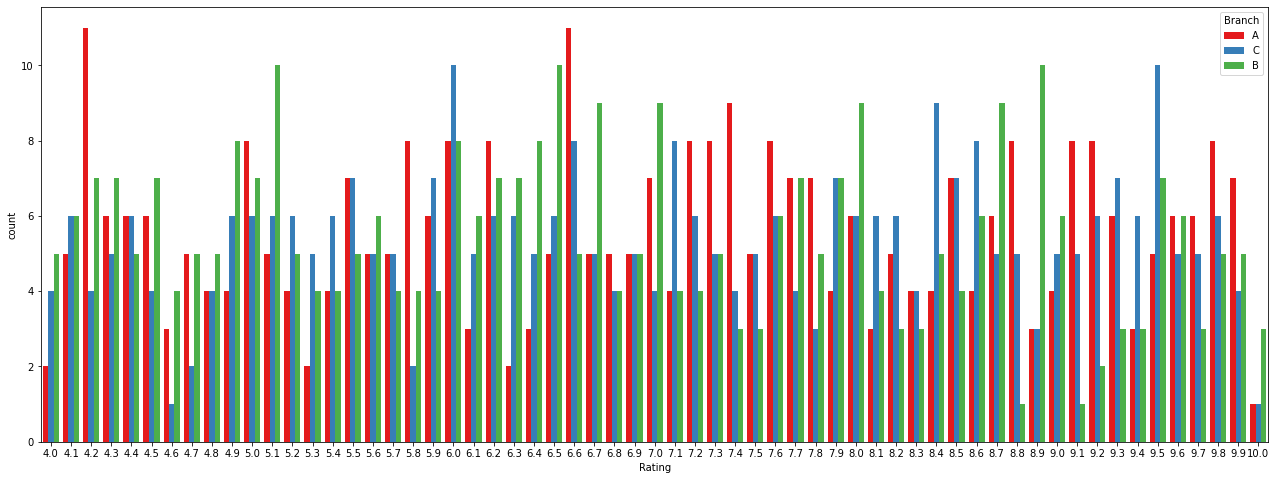

In [37]:
print(data.groupby('Rating')['Branch'].value_counts())
plt.figure(figsize=(22,8))
sns.countplot(data=data,x="Rating",hue="Branch",saturation=True,palette="Set1");

An interesting thing is that branch A with the highest sales has the most least rating at 4.0 branch B has the highest best rating at 10.0 .

Summary

From the dataset of a total of 1000 customers we see that there is an equal percentage distribution between it's male and female customers at 50% each. The dataset has an even distribution.

The most preferred payment type is Ewallet at 34.5% followed by Cash at 34.4% and Credit card at 31.1%. These differences are closely to each other ranging between 30% and 34%

Ewallet use among male customers at 18.5% was the preferred payment type compared to it's female use at 16%.

When it comes to sales based on Product Line Categories across all branches, Fashion accessories were the most sold at 17.8% followed by Food and beverages at 17.4% then Electronic accessories at 17%.Sports and travel items came in at fourth position with 16.6% followed by Health and lifestyle products at 16% and the product that had it's sales lowest among the other categories was product line under Health and beauty at 15.2%.

The supermarket in Yangon city had the highest gross income followed by the one in Mandalay city and Naypytaw city respectively.This is because is the largest city and Yangon is also a trade and logistics hub. Home to the country's main air and sea ports. Mandalay second largest in the country (after Yangon [Rangoon]) focus of regional communications and trade and transportation routes. Naypyidaw is a fully constructed large city but with very few inhabitants compared to its size

There is a relation to high gross income with customer type being a member at 50.1% while a Normal customer at 49.9%

Ewallet and Credit card have more Member and Normal customer type contributing above 40 gross income compared to both Member and normal customer type using cash.

Female customers have the most purchases in product lines of (Fashion accessories, Food and beverage, sports and travel) while the male customers have most purchases in Health and beauty with slight purchase difference in Home and lifestyle, electronic accessories.

An interesting thing is that branch A with the highest sales has the most least rating at 4.0 branch B has the highest best rating at 10.0